# **Odor data Preprocessing**

## **I. Data**

In [24]:
data_path = "/content/drive/Othercomputers/내 컴퓨터/라벨이 지정되지 않은 볼륨[F]/교수님/PLS 양돈 농가/데이터/"

In [25]:
import pandas as pd
import numpy as np

### 원 데이터
odor = pd.read_csv(data_path + "New_data.csv", encoding="euc-kr")
odor = odor.drop(["yy", "mm", "dd", "farm"], axis = 1)    # 불필요한 변수 제거
odor.rename(columns = {"mm.1" : "mm"}, inplace = True)    # 추후 변수명을 편하게 사용하기 위해
print(odor.shape)

(57, 16)


In [26]:
display(odor.head())
display(np.round(odor.describe(), 3))

,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300.0,0.56,145.0,0.09,12.80,0.025,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300.0,0.62,310.0,19.40,462.00,0.025,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448.0,0.97,90.5,0.04,63.90,0.025,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080.0,1.02,344.0,0.04,13.00,0.630,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310.0,1.18,312.0,0.04,0.04,0.025,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
count,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000,57.000
mean,1579.649,5.894,364.623,14.346,11.989,0.184,533.212,398.673,38.327,338.586,99.495,191.457,13.147,74.291,2.422,4.429
std,1521.333,5.156,401.594,26.108,61.543,0.605,548.733,381.129,36.946,317.637,121.992,305.561,18.817,78.959,3.480,5.221
min,100.000,0.560,22.900,0.040,0.040,0.025,0.170,0.170,0.930,0.470,1.580,0.270,0.050,0.030,0.200,0.190
25%,448.000,2.080,86.000,0.040,0.040,0.025,71.480,77.500,9.260,46.550,21.470,29.800,3.870,16.620,0.200,1.430
50%,1000.000,4.150,268.000,0.040,0.040,0.025,357.890,383.930,35.580,235.890,73.400,89.920,9.220,60.560,1.060,2.750
75%,2080.000,9.540,457.000,16.400,2.550,0.025,885.900,505.400,47.950,547.440,135.790,207.800,14.610,98.700,3.600,5.430
max,6694.000,22.240,1754.000,120.000,462.000,3.490,2446.000,2109.690,217.170,1455.520,743.690,1869.400,125.720,481.200,22.260,34.570


## **II. 결측값**

### **1. 결측값 확인**

In [27]:
### 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
na_df = pd.DataFrame(odor.isna().sum(), columns = ["NA"]).transpose()
nd_df = pd.DataFrame(odor.apply(lambda x : (x == "ND").sum(), axis = 0), columns = ["ND"]).transpose()

missing_df = pd.concat([na_df, nd_df], axis = 0)
missing_df

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


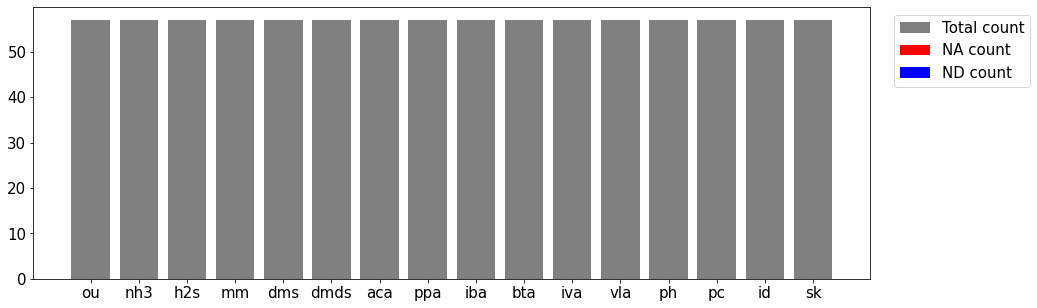

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
plt.bar(odor.columns, odor.count(), label = "Total count", color = "grey")
plt.bar(odor.columns, odor.isna().sum(), label = "NA count", color = "red")
plt.bar(odor.columns, odor.apply(lambda x : (x == "ND").sum(), axis = 0), label = "ND count", color = "blue")
plt.xticks(fontsize = 15) ; plt.yticks(fontsize = 15)
plt.legend(loc = "upper right", labels = ["Total count", "NA count", "ND count"], 
           bbox_to_anchor=(1.2, 1), fontsize = 15)
plt.show()

### **2. 결측치 대체**

- ND → MDL/2
- NA → Multiple Imputation Method

In [29]:
mdl = pd.read_csv(data_path + "MDL.csv")
mdl

,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,0.08,0.06,0.07,0.08,0.05,0.07,0.34,0.52,0.93,0.49,0.53,0.09,0.06,0.4,0.38


In [30]:
!pip install impyute

In [31]:
### 결측치 처리

# ND 값 → MDL/2
if num_nd != 0 :
  for i in range(1, odor.shape[1]) :
    var = odor.columns[i]
    odor[var] = odor[var].replace("ND", mdl[var][0]/2)

odor = (odor).astype(float)


# 결측값 → M.I method
from impyute.imputation.cs import mice
if num_na != 0 :
  odor = pd.DataFrame(mice(odor.values))



# 결측값 확인
num_na = odor.isna().sum().sum()
num_nd = odor.apply(lambda x : (x == "ND").sum(), axis = 0).sum()

print("NA 개수 :", num_na, " ND 개수 :",  num_nd)
display(odor.head())

NA 개수 : 0  ND 개수 : 0


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
0,300.0,0.56,145.0,0.09,12.80,0.025,30.60,17.57,2.78,10.80,3.64,7.72,2.84,0.03,0.20,3.00
1,300.0,0.62,310.0,19.40,462.00,0.025,916.52,1055.96,109.07,977.44,319.49,619.49,30.51,137.81,3.60,10.40
2,448.0,0.97,90.5,0.04,63.90,0.025,663.42,737.23,73.94,837.83,215.64,469.79,14.61,67.52,0.94,3.92
3,2080.0,1.02,344.0,0.04,13.00,0.630,490.79,570.61,51.09,719.27,168.48,237.64,8.90,60.56,5.55,7.31
4,310.0,1.18,312.0,0.04,0.04,0.025,404.53,468.03,43.17,573.75,157.22,205.67,9.21,69.90,0.20,5.43


## **III. Visualization**

### **1. Boxplot**

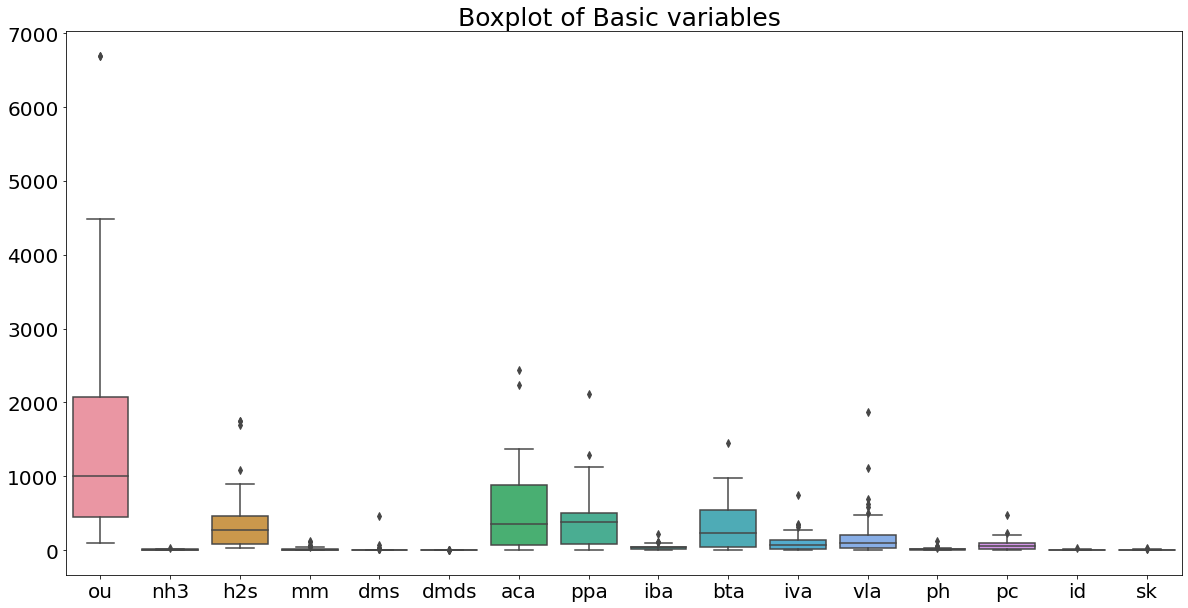

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))

sns.boxplot(data = odor)
plt.title("Boxplot of Basic variables ", fontsize = 25)
plt.xticks(fontsize = 20) ; plt.yticks(fontsize = 20)

plt.show()

### **2. Histogram**

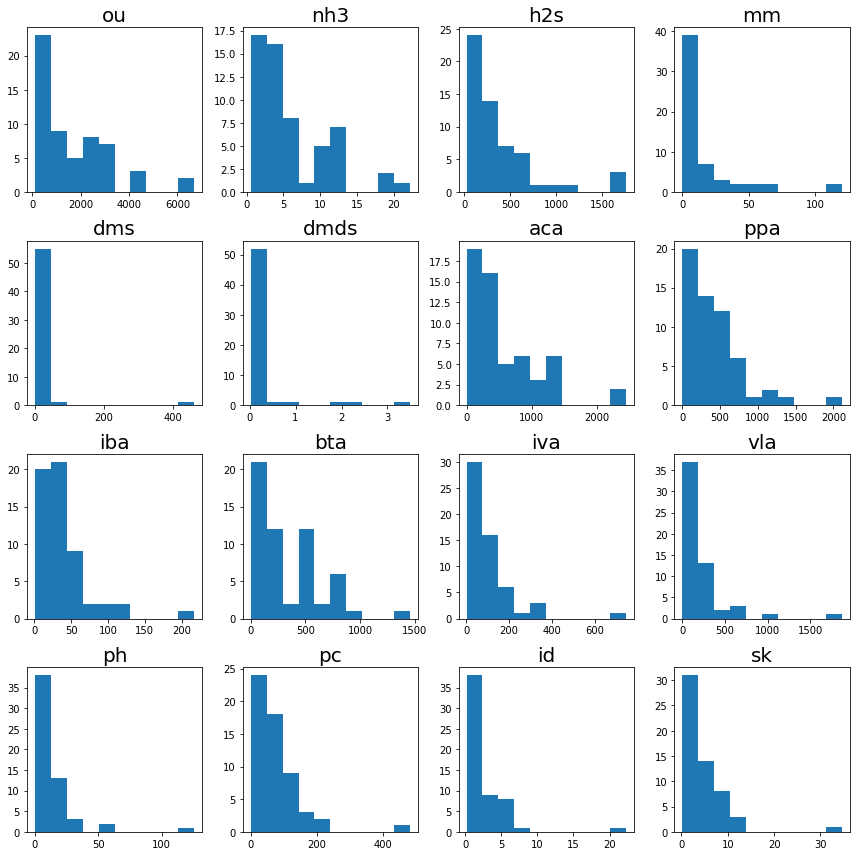

In [33]:
plt.figure(figsize = (12, 12))

for i in range(odor.shape[1]) :
  plt.subplot(4, 4, i+1)
  plt.hist(odor.iloc[:, i])
  plt.title(odor.columns[i], fontsize = 20)

plt.tight_layout()
plt.show()

### **3. Correlation**

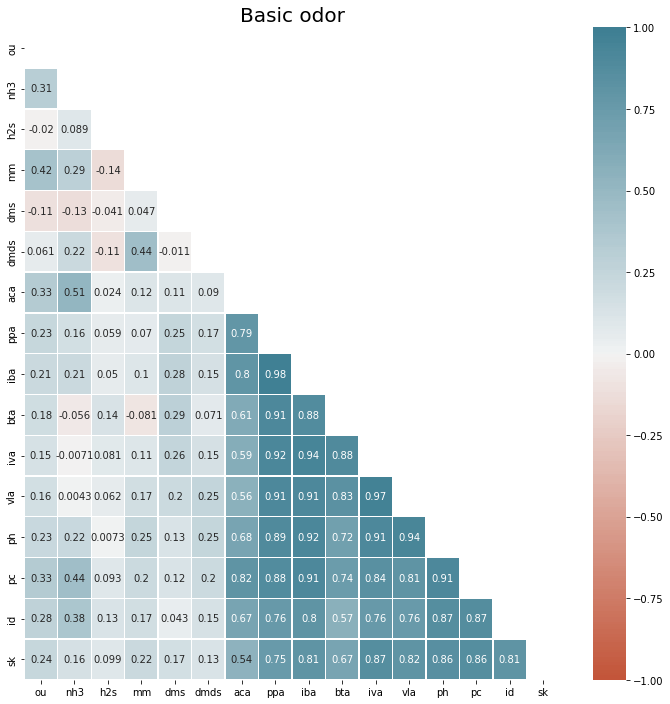

In [34]:
basic_corr = odor.corr()

### 그래프의 윗부분을 공백화
mask = np.zeros_like(basic_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,12))

### Basic 
sns.heatmap(basic_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Basic odor", fontsize = 20)

plt.show()

Basic Max Corrleation : 0.421


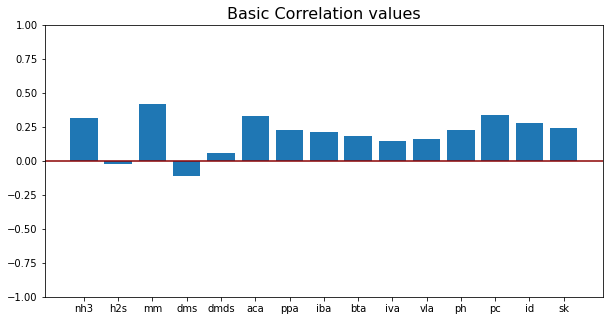

In [35]:
print("Basic Max Corrleation :", np.round(max(basic_corr.iloc[0, 1:]), 3))


### basic Response에 대한 설명변수의 correlation
plt.figure(figsize = (10, 5))

plt.bar(range(basic_corr.shape[1]-1), basic_corr.iloc[0, 1:],)
plt.xticks(range(basic_corr.shape[1]-1), labels = basic_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Basic Correlation values", fontsize = 16)


plt.show()

## **IV. Transformation**

- Only Standardization

- Log + Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

### Only Standardization
st_odor = StandardScaler().fit_transform(odor)
st_odor = pd.DataFrame(st_odor, columns = odor.columns)
display(np.round(st_odor.describe(), 3).iloc[1:3, :])


### Log + Standardization
log_st_odor = StandardScaler().fit_transform(np.log(odor))
log_st_odor = pd.DataFrame(log_st_odor, columns = odor.columns)
display(np.round(log_st_odor.describe(), 3).iloc[1:3, :])

,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
mean,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009


,ou,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009,1.009


In [37]:
# st_odor.to_csv(data_path + "/standardization.csv", header = True, index = False)
# log_st_odor.to_csv(data_path + "/log standardization.csv", header = True, index = False)

### **1. Boxplot**

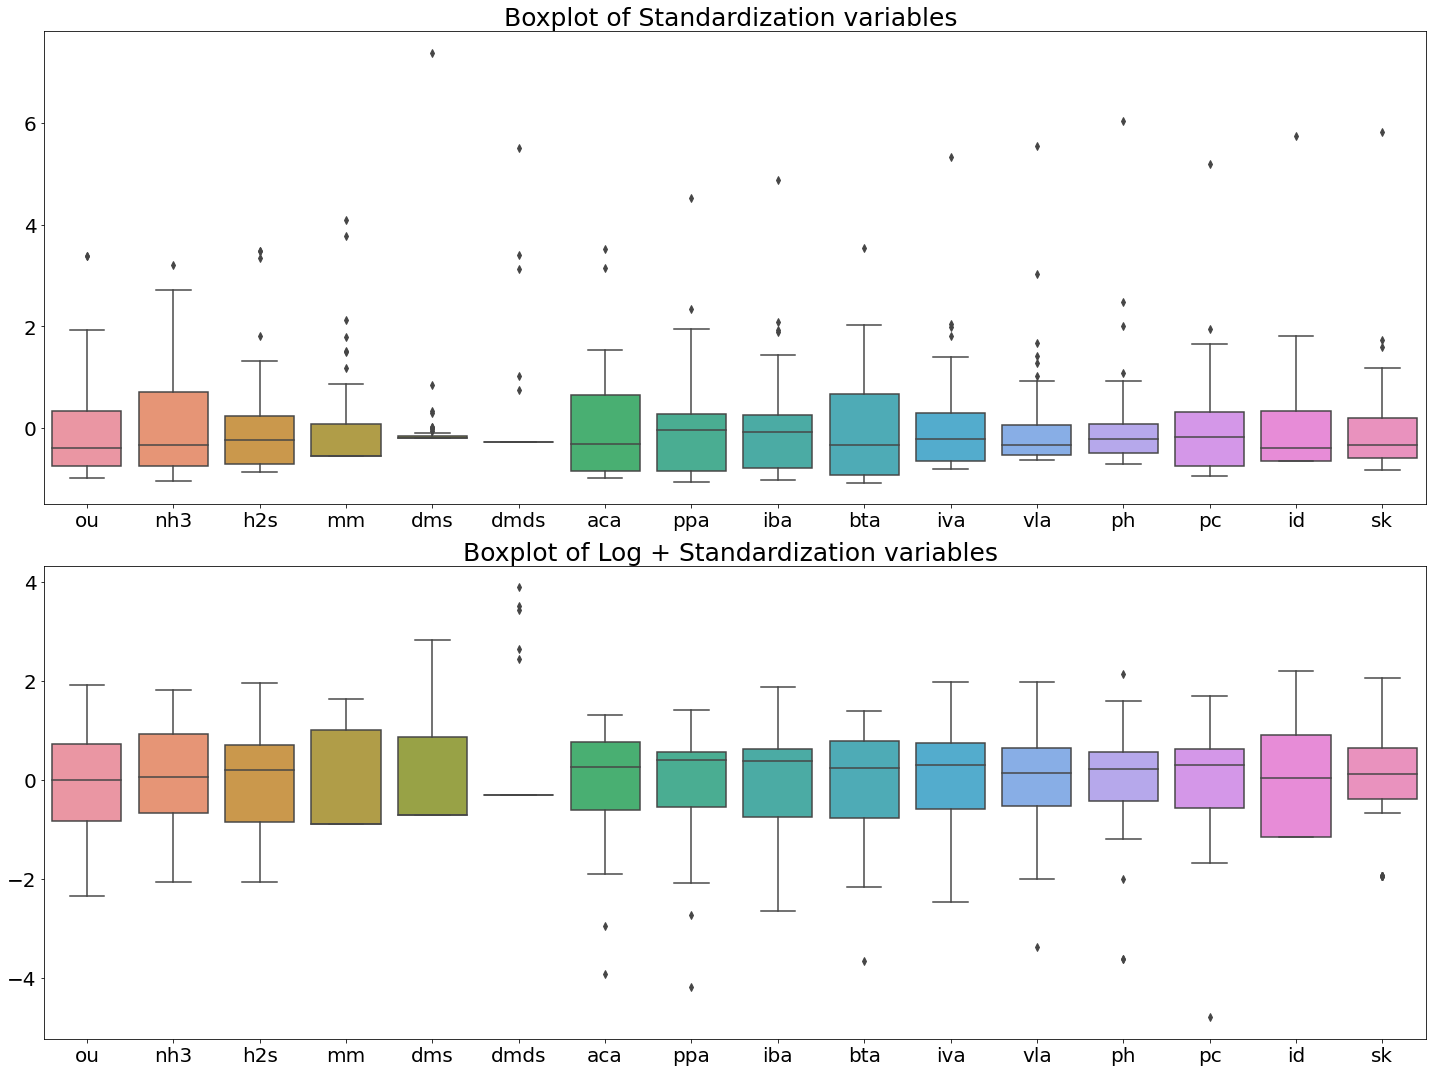

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))

plt.subplot(2,1,1)
sns.boxplot(data = st_odor)
plt.title("Boxplot of Standardization variables ", fontsize = 25)
plt.xticks(fontsize = 20) ; plt.yticks(fontsize = 20)

plt.subplot(2,1,2)
sns.boxplot(data = log_st_odor)
plt.title("Boxplot of Log + Standardization variables ", fontsize = 25)
plt.xticks(fontsize = 20) ; plt.yticks(fontsize = 20)

plt.tight_layout()
plt.show()

### **2. Histogram**

Boxplot of Standardization variables 



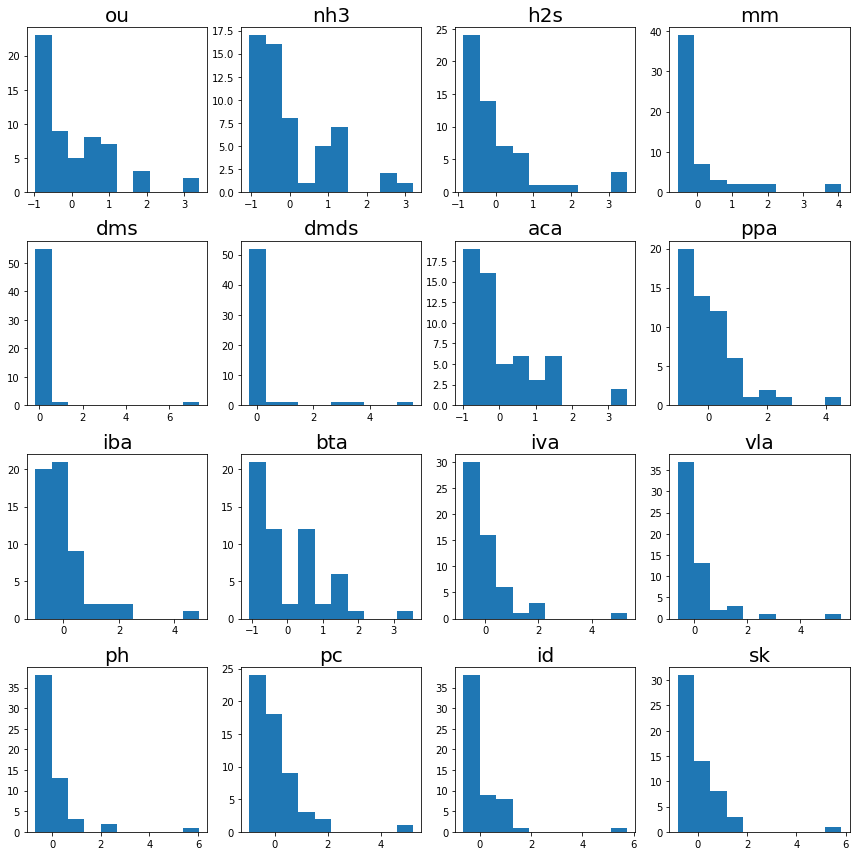

In [39]:
print("Boxplot of Standardization variables \n")

plt.figure(figsize = (12, 12))

for i in range(st_odor.shape[1]) :
  plt.subplot(4, 4, i+1)
  plt.hist(st_odor.iloc[:, i])
  plt.title(st_odor.columns[i], fontsize = 20)

plt.tight_layout()
plt.show()

Boxplot of Log + Standardization variables 



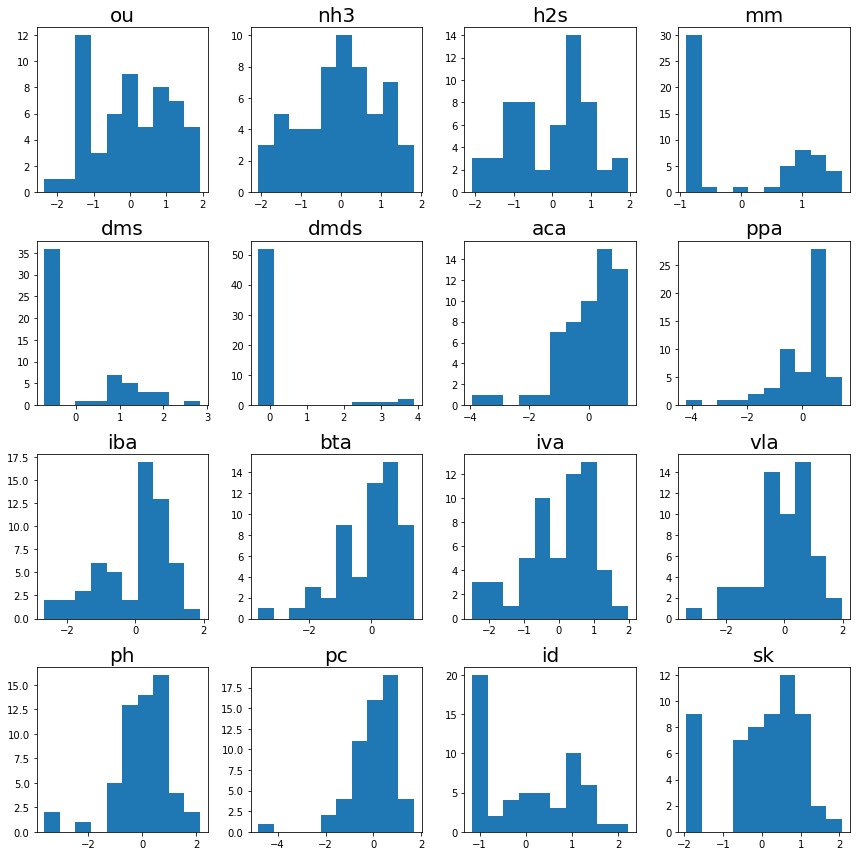

In [40]:
print("Boxplot of Log + Standardization variables \n")

plt.figure(figsize = (12, 12))

for i in range(log_st_odor.shape[1]) :
  plt.subplot(4, 4, i+1)
  plt.hist(log_st_odor.iloc[:, i])
  plt.title(log_st_odor.columns[i], fontsize = 20)

plt.tight_layout()
plt.show()

### **3. Correlation**

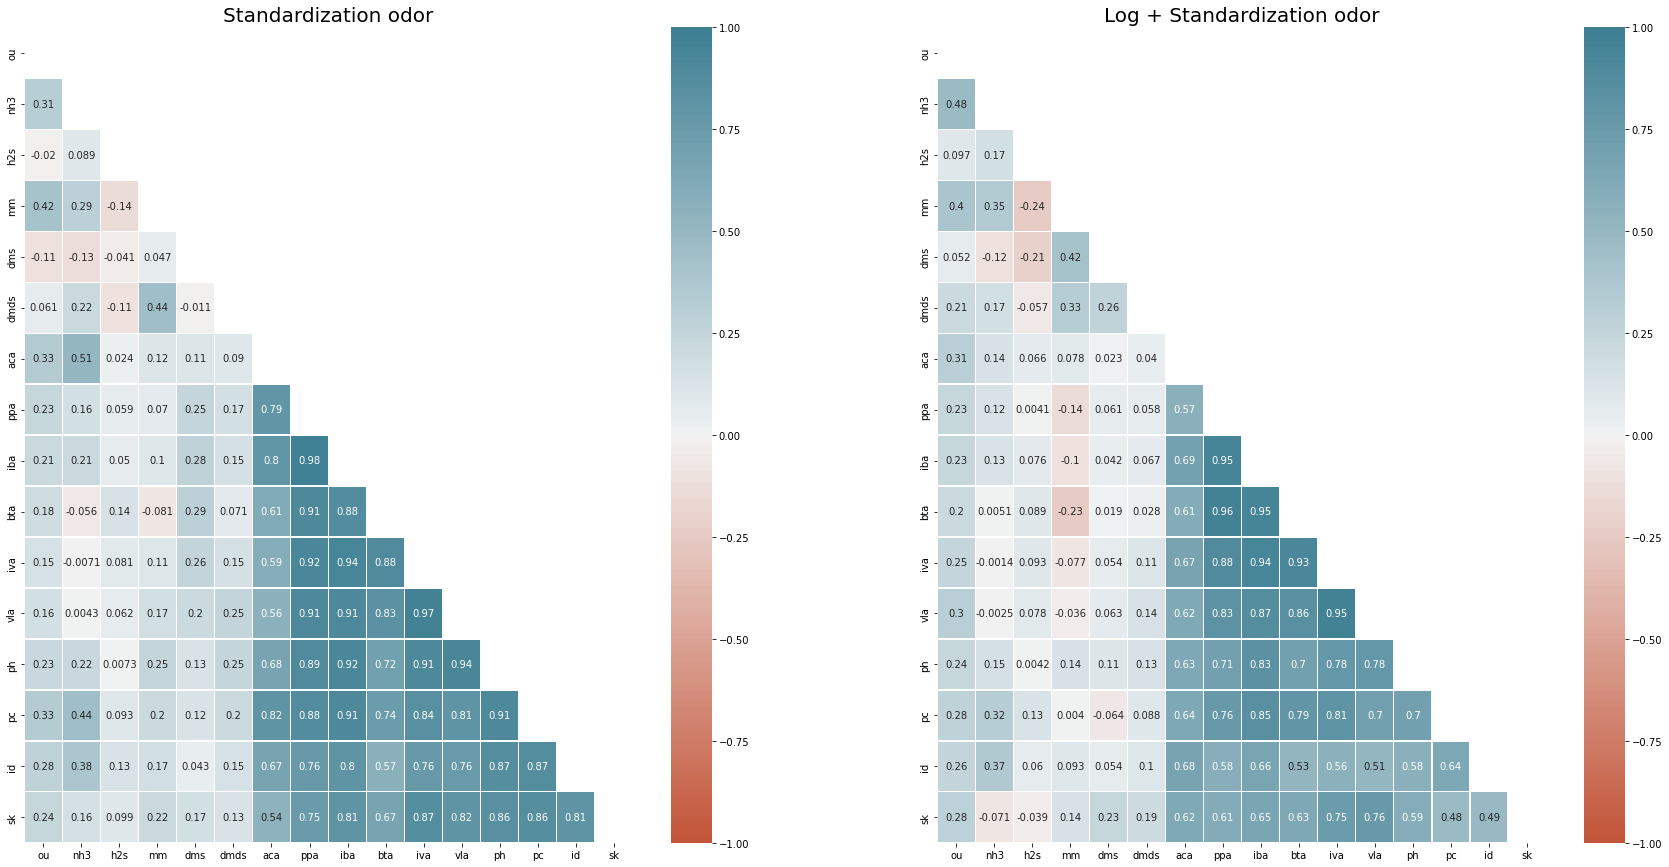

In [41]:
st_corr = st_odor.corr()
log_st_corr = log_st_odor.corr()


### 그래프의 윗부분을 공백화
mask = np.zeros_like(st_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (30,15))

### Standarization
plt.subplot(1,2,1)
sns.heatmap(st_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Standardization odor", fontsize = 20)

### Log + Standarization
plt.subplot(1,2,2)
sns.heatmap(log_st_corr, vmin = -1, vmax = 1, center = 0, mask = mask,
            cmap = sns.diverging_palette(20, 220, n=200), linewidths = .3, annot = True)
plt.title("Log + Standardization odor", fontsize = 20)

plt.show()

Standardization Max Corrleation : 0.421
Log + Standardization Max Corrleation : 0.478


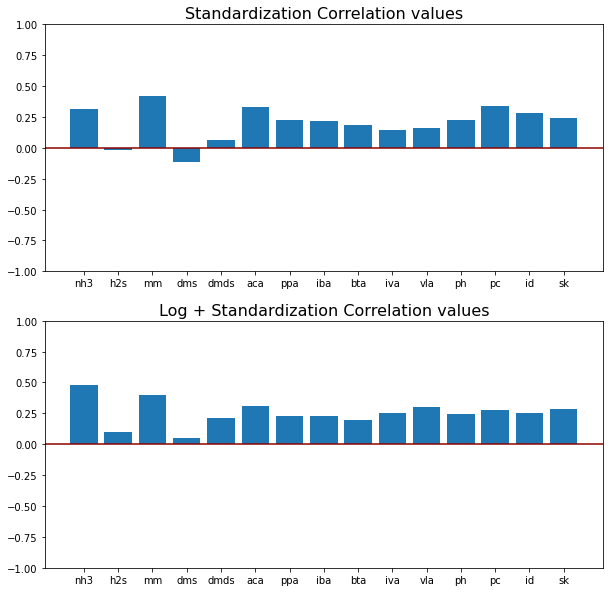

In [42]:
print("Standardization Max Corrleation :", np.round(max(st_corr.iloc[0, 1:]), 3))
print("Log + Standardization Max Corrleation :", np.round(max(log_st_corr.iloc[0, 1:]), 3))


### Standardization Response에 대한 설명변수의 correlation
plt.figure(figsize = (10, 10))

plt.subplot(2, 1, 1)
plt.bar(range(st_corr.shape[1]-1), st_corr.iloc[0, 1:],)
plt.xticks(range(st_corr.shape[1]-1), labels = st_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Standardization Correlation values", fontsize = 16)


### Log + Standardization Response에 대한 설명변수의 correlation
plt.subplot(2, 1, 2)
plt.bar(range(log_st_corr.shape[1]-1), log_st_corr.iloc[0, 1:],)
plt.xticks(range(log_st_corr.shape[1]-1), labels = log_st_corr.columns[1:])
plt.ylim(-1, 1)
plt.axhline(0, linestyle = "-", color = "darkred")
plt.title("Log + Standardization Correlation values", fontsize = 16)


plt.show()

## **V. Regression Assumpution**

### **1. VIF**

In [43]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Regression Models
basic_model = ols("ou ~ " + " + ".join(odor.columns[1:]), data = odor).fit()
basic_X = odor.iloc[:, 1:]

st_model = ols("ou ~ " + " + ".join(st_odor.columns[1:]), data = st_odor).fit()
st_X = st_odor.iloc[:, 1:]

log_st_model = ols("ou ~ " + " + ".join(log_st_odor.columns[1:]), data = log_st_odor).fit()
log_st_X = log_st_odor.iloc[:, 1:]


### VIF

basic_vif = pd.DataFrame()
basic_vif["Basic VIF"] = [np.round(variance_inflation_factor(basic_X.values, i), 3) for i in range(basic_X.shape[1])]
basic_vif = basic_vif.transpose()
basic_vif.columns = basic_X.columns

st_vif = pd.DataFrame()
st_vif["Standardization VIF"] = [np.round(variance_inflation_factor(st_X.values, i), 3) for i in range(st_X.shape[1])]
st_vif = st_vif.transpose()
st_vif.columns = st_X.columns

log_st_vif = pd.DataFrame()
log_st_vif["Log + Standardization VIF"] = [np.round(variance_inflation_factor(log_st_X.values, i), 3) for i in range(log_st_X.shape[1])]
log_st_vif = log_st_vif.transpose()
log_st_vif.columns = log_st_X.columns


vif_df = pd.concat([basic_vif, st_vif, log_st_vif], axis = 0)
vif_df

,nh3,h2s,mm,dms,dmds,aca,ppa,iba,bta,iva,vla,ph,pc,id,sk
Basic VIF,8.998,2.207,2.108,1.630,1.762,22.152,185.484,334.914,50.494,200.108,63.020,66.421,52.060,9.199,17.335
Standardization VIF,4.995,1.295,1.692,1.585,1.614,11.314,90.225,160.353,24.622,120.828,51.377,46.700,33.530,6.239,10.732
Log + Standardization VIF,2.637,1.395,2.618,1.578,1.224,2.972,31.453,71.994,33.273,52.372,19.403,6.733,6.966,3.134,3.537


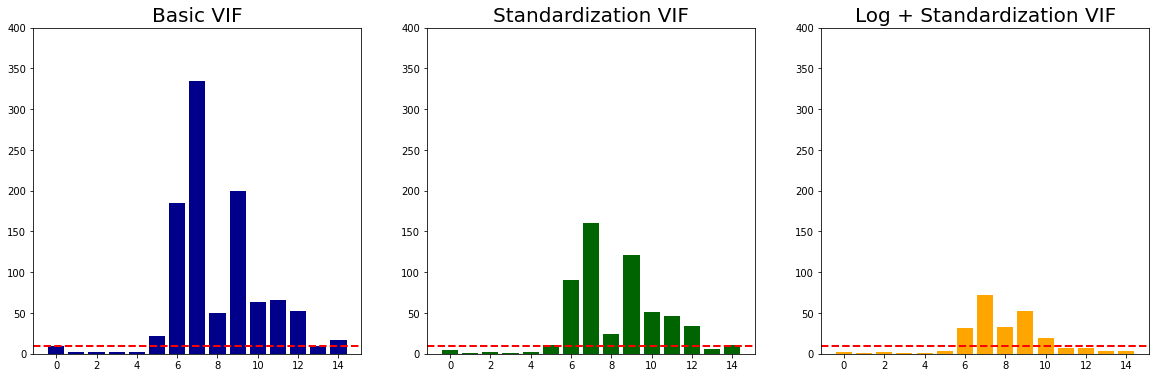

In [44]:
plt.figure(figsize = (20, 6))

plt.subplot(1,3,1)
plt.bar(range(basic_vif.shape[1]), basic_vif.iloc[0,:], color = "darkblue")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.ylim([0, 400])
plt.title("Basic VIF", fontsize = 20)

plt.subplot(1,3,2)
plt.bar(range(st_vif.shape[1]), st_vif.iloc[0, :], color = "darkgreen")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.ylim([0, 400])
plt.title("Standardization VIF", fontsize = 20)

plt.subplot(1,3,3)
plt.bar(range(log_st_vif.shape[1]), log_st_vif.iloc[0, :], color = "orange")
plt.axhline(10, linestyle = "--", color = "r", linewidth = 2)
plt.ylim([0, 400])
plt.title("Log + Standardization VIF", fontsize = 20)

plt.show()

### **2. Residual**

- 잔차의 정규성 (Shapiro-test)
  - $H_0$ : 모집단은 정규분포를 따른다.   vs   $H_1$ : 모집단은 정규분포를 따르지 않는다.

- 잔차의 독립성 (Durbin-Watson test)
  -  DW statistic 값이 2 근처의 값이 나오는 경우 자기상관관계가 없다. (= 독립)

- 잔차의 등분산성 (Breusch-Pagan test)
  - $H_0$ : 등분산성이다.  vs  $H_1$ : 등분산성이 아니다.


In [45]:
### Ressidual
basic_X = odor.iloc[:, 1:]    ;   basic_y = odor.iloc[:, 0]
basic_fitted = basic_model.predict(basic_X)
basic_residual = basic_model.resid

st_X = odor.iloc[:, 1:]    ;   st_y = odor.iloc[:, 0]
st_fitted = st_model.predict(st_X)
st_residual = st_model.resid

log_st_X = odor.iloc[:, 1:]    ;   log_st_y = odor.iloc[:, 0]
log_st_fitted = log_st_model.predict(log_st_X)
log_st_residual = log_st_model.resid


### 정규성
import scipy.stats
basic_shapiro = np.round(scipy.stats.shapiro(basic_residual)[1], 3)
st_shapiro = np.round(scipy.stats.shapiro(st_residual)[1], 3)
log_st_shapiro = np.round(scipy.stats.shapiro(log_st_residual)[1], 3)

shapiro_df = pd.DataFrame([basic_shapiro, st_shapiro, log_st_shapiro], 
                          columns = ["Shapiro"], index = ["Basic", "Standardization", "Log Standardization"])


### 독립성 - Durbon-Watson
from statsmodels.stats.stattools import durbin_watson
basic_durbin = np.round(durbin_watson(basic_residual), 3)
st_durbin = np.round(durbin_watson(st_residual), 3)
log_st_durbin = np.round(durbin_watson(log_st_residual), 3)

dw_df = pd.DataFrame([basic_durbin, st_durbin, log_st_durbin], 
                      columns = ["Durbin"], index = ["Basic", "Standardization", "Log Standardization"])


### 등분산성
import statsmodels.stats.api as sms
basic_bp = sms.het_breuschpagan(basic_model.resid, basic_model.model.exog)
basic_bp = np.round(basic_bp[1], 3)
st_bp = sms.het_breuschpagan(st_model.resid, st_model.model.exog)
st_bp = np.round(st_bp[1], 3)
log_st_bp = sms.het_breuschpagan(log_st_model.resid, log_st_model.model.exog)
log_st_bp = np.round(log_st_bp[1], 3)
bp_df = pd.DataFrame([basic_bp, st_bp, log_st_bp], 
                      columns = ["BP"], index = ["Basic", "Standardization", "Log Standardization"])


resid_df = pd.concat([shapiro_df, dw_df, bp_df], axis =1)
resid_df

,Shapiro,Durbin,BP
Basic,0.000,1.897,0.944
Standardization,0.000,1.897,0.944
Log Standardization,0.617,1.841,0.435


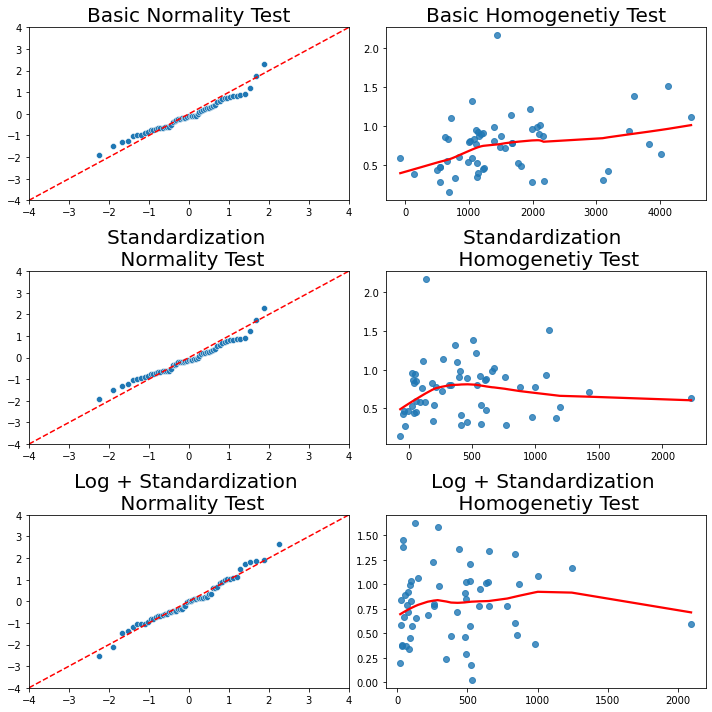

In [46]:
plt.figure(figsize = (10, 10))

basic_sr = scipy.stats.zscore(basic_residual)
(basic_x, basic_y),_ = scipy.stats.probplot(basic_sr)

st_sr = scipy.stats.zscore(st_residual)
(st_x, st_y),_ = scipy.stats.probplot(st_sr)

log_st_sr = scipy.stats.zscore(log_st_residual)
(log_st_x, log_st_y),_ = scipy.stats.probplot(log_st_sr)

plt.subplot(3, 2, 1)
sns.scatterplot(x = basic_x, y = basic_y)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.title("Basic Normality Test", fontsize = 20)

plt.subplot(3, 2, 2)
sns.regplot(x = basic_fitted, y = np.sqrt(np.abs(basic_sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Basic Homogenetiy Test", fontsize = 20)

plt.subplot(3, 2, 3)
sns.scatterplot(x = st_x, y = st_y)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.title("Standardization \n Normality Test", fontsize = 20)

plt.subplot(3, 2, 4)
sns.regplot(x = st_fitted, y = np.sqrt(np.abs(st_sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Standardization \n Homogenetiy Test", fontsize = 20)

plt.subplot(3, 2, 5)
sns.scatterplot(x = log_st_x, y = log_st_y)
plt.plot([-4, 4], [-4, 4], linestyle = "--", color = "red")
plt.ylim(-4, 4) ; plt.xlim(-4, 4)
plt.title("Log + Standardization \n Normality Test", fontsize = 20)

plt.subplot(3, 2, 6)
sns.regplot(x = log_st_fitted, y = np.sqrt(np.abs(log_st_sr)), lowess = True, line_kws = {"color" : "red"})
plt.title("Log + Standardization \n Homogenetiy Test", fontsize = 20)

plt.tight_layout()
plt.show()